# Bee Sound Classification - CNN Model

## Fetch Processed Data

In [ ]:
import numpy as np
from numpy import genfromtxt
from sklearn.model_selection import train_test_split


In [ ]:
# extracting data from csv files into numpy arrays
x_preprocessed = genfromtxt('Data Bee Save/x_preprocessed.csv', delimiter=',')
y_preprocessed = genfromtxt('Data Bee Save/y_preprocessed.csv',
                     delimiter=',', dtype=('<U10'))


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(y_preprocessed)
y_preprocessed = to_categorical(labelencoder.transform(y_preprocessed))


### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_preprocessed, y_preprocessed, test_size=0.2, random_state=0)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
from collections import Counter
Counter(list(y_train)),Counter(list(y_test)),Counter(list(y_val))

(Counter({'NoQueenBee': 2109, 'QueenBee': 2388, 'Swarming': 214}),
 Counter({'NoQueenBee': 663, 'QueenBee': 752, 'Swarming': 58}),
 Counter({'NoQueenBee': 562, 'QueenBee': 573, 'Swarming': 43}))

In [ ]:
# shape
x_train.shape, x_test.shape,x_val.shape, y_train.shape, y_test.shape, y_val.shape


((4711, 200), (1473, 200), (1178, 200), (4711, 3), (1473, 3), (1178, 3))

In [ ]:
# reshaping to 2D
x_train = np.reshape(x_train, (x_train.shape[0], 40, 5))
x_test = np.reshape(x_test, (x_test.shape[0], 40, 5))
x_val = np.reshape(x_val, (x_val.shape[0], 40, 5))
x_train.shape, x_test.shape,x_val.shape


((4711, 40, 5), (1473, 40, 5), (1178, 40, 5))

In [ ]:
# reshaping to shape required by CNN
x_train = np.reshape(x_train, (x_train.shape[0], 40, 5, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 40, 5, 1))
x_val = np.reshape(x_val, (x_val.shape[0], 40, 5, 1))
x_train.shape, x_test.shape,x_val.shape

((4711, 40, 5, 1), (1473, 40, 5, 1), (1178, 40, 5, 1))

## Build Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [ ]:
# forming model
model = Sequential()


In [ ]:
# adding layers and forming the model
model.add(Conv2D(64, kernel_size=5, strides=1, padding="Same",
          activation="relu", input_shape=(40, 5, 1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128, kernel_size=5, strides=1,
          padding="same", activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(3, activation="softmax"))


In [ ]:
# compiling
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])


## Training

In [ ]:
# training the model
model.fit(x_train, y_train, batch_size=50, epochs=30,
          validation_data=(x_val, y_val))


Epoch 1/30
95/95 [==============================] - 4s 38ms/step - loss: 0.9071 - accuracy: 0.5825 - val_loss: 0.2817 - val_accuracy: 0.9168
Epoch 2/30
95/95 [==============================] - 3s 36ms/step - loss: 0.1440 - accuracy: 0.9495 - val_loss: 0.0787 - val_accuracy: 0.9703
Epoch 3/30
95/95 [==============================] - 3s 36ms/step - loss: 0.0892 - accuracy: 0.9743 - val_loss: 0.0266 - val_accuracy: 0.9898
Epoch 4/30
95/95 [==============================] - 3s 36ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0238 - val_accuracy: 0.9907
Epoch 5/30
95/95 [==============================] - 3s 35ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0210 - val_accuracy: 0.9915
Epoch 6/30
95/95 [==============================] - 3s 35ms/step - loss: 0.0342 - accuracy: 0.9919 - val_loss: 0.1693 - val_accuracy: 0.9652
Epoch 7/30
95/95 [==============================] - 3s 35ms/step - loss: 0.0333 - accuracy: 0.9919 - val_loss: 0.0115 - val_accuracy: 0.9958
Epoch 8/30
95

## Results

In [ ]:
# train and test loss and scores respectively
train_loss_score = model.evaluate(x_train, y_train)
test_loss_score = model.evaluate(x_test, y_test)
print(train_loss_score)
print(test_loss_score)


47/47 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.9952
[0.09712529182434082, 0.9942687153816223]
[0.034668173640966415, 0.9952477812767029]


In [ ]:
results = model.predict(x_test)


47/47 [==============================] - 0s 8ms/step


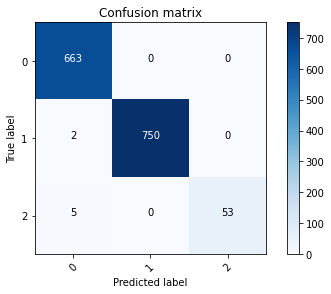

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred_classes = np.argmax(results, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(3))


## Saving

In [ ]:
model.save('BeeSoundModel')


INFO:tensorflow:Assets written to: BeeSoundModel\assets


INFO:tensorflow:Assets written to: BeeSoundModel\assets
